# Big Data Mart Sales Problem

# importing modules

In [1195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [1196]:
train_data = pd.read_csv("bigdatamart_Train.csv")
test_data = pd.read_csv("bigdatamart_Test.csv")

In [1197]:
#combining training nad testing data
train_data['source'] = 'bigdatamart_Train'
test_data['source'] = 'bigdatamart_Test'
data = pd.concat([train_data, test_data], ignore_index=True)
print(train_data.shape,test_data.shape,data.shape)

(8523, 14) (5681, 14) (14204, 14)


In [1198]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,bigdatamart_Train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,bigdatamart_Train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,bigdatamart_Train,Food
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,bigdatamart_Train,Food
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,bigdatamart_Train,Non-Consumable


In [1199]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.070034,141.004977,1997.830681,2181.288914
std,4.234226,0.048602,62.086938,8.371664,1321.864430
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.300000,0.033143,94.012000,1987.000000,1468.089000
50%,12.792854,0.062347,142.247000,1999.000000,2181.288914
75%,16.000000,0.094037,185.855600,2004.000000,2181.288914
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data preprocessing

In [1200]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
Item_Type_Combined           0
dtype: int64

In [1201]:
#replacing null values in the Outlet_sales
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [1202]:
#replacing null values in Item-weight
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [1203]:
data["Outlet_Size"].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [1204]:
#replacing null values by mod=st repetating values
data.Outlet_Size = data.Outlet_Size.fillna("Medium")

In [1205]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
Item_Type_Combined           0
dtype: int64

In [1206]:
#checking 0 null values in the dataset
sum(data['Item_Visibility']==0)

0

In [1207]:
#replacing 0 with the mean
data.loc[:, 'Item_Visibility'].replace([0], [data['Item_Visibility'].mean()], inplace=True)

In [1208]:
sum(data['Item_Visibility']==0)

0

In [1209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  obj

In [1210]:
data["Item_Identifier"].value_counts()

DRL01    10
FDO57    10
NCX05    10
FDB32    10
FDC10    10
         ..
FDI46     7
FDH58     7
FDM10     7
DRN11     7
FDL50     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [1211]:
#replacing Item_fat_content
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace ({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
data["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [1212]:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()


Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [1213]:
data.loc[data['Item_Type_Combined']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [1214]:
#creating small values for establishment years
data["Outlet_Establishment_Year"] = 2013-data["Outlet_Establishment_Year"]
data["Outlet_Establishment_Year"]

0        14
1         4
2        14
3        15
4        26
         ..
14199    16
14200     4
14201    11
14202     6
14203    11
Name: Outlet_Establishment_Year, Length: 14204, dtype: int64

In [1215]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,bigdatamart_Train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,bigdatamart_Train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,bigdatamart_Train,Food
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,732.3800,bigdatamart_Train,Food
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,bigdatamart_Train,Non-Consumable


# Importing Data

In [1216]:
#now we are going to divide test and train data using source column we have created and we will follow EDA procress
import warnings

#At first drop the necessary columns and then split the data




train = data.loc[data["source"] == 'bigdatamart_Train']
test = data.loc[data["source"] == 'bigdatamart_Test']



#save them to CSVfor futher use
train.to_csv("bigdatamart_Train.csv", index = False)
test.to_csv("bigdatamart_Test.csv", index = False)



# Exploratory Data analysis

In [1217]:
#import the data
train_new = pd.read_csv("bigdatamart_Train.csv")

In [1218]:
train_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,bigdatamart_Train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,bigdatamart_Train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,bigdatamart_Train,Food
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,732.3800,bigdatamart_Train,Food
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,bigdatamart_Train,Non-Consumable


In [1219]:
train_new.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.846524,0.070202,140.992782,15.168133,2181.288914
std,4.226194,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,4.000000,33.290000
25%,9.310000,0.033085,93.826500,9.000000,834.247400
50%,12.792854,0.062517,143.012800,14.000000,1794.331000
75%,16.000000,0.094585,185.643700,26.000000,3101.296400
max,21.350000,0.328391,266.888400,28.000000,13086.964800


# Exploratory Data Analysis

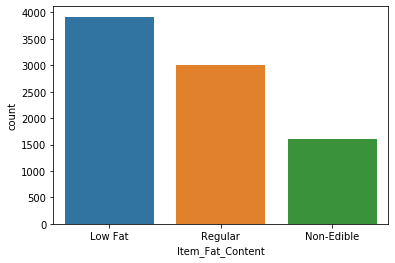

In [1220]:
sns.countplot(train_new["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

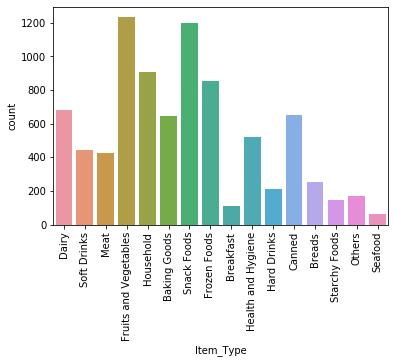

In [1221]:
l = list(train_new['Item_Type'].unique())
chart = sns.countplot(train_new["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

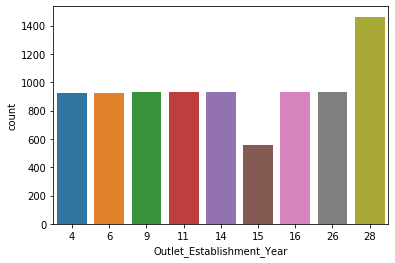

In [1222]:
sns.countplot(train_new['Outlet_Establishment_Year'])

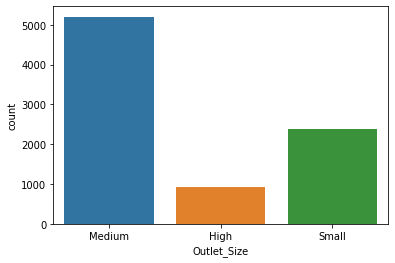

In [1223]:
sns.countplot(train_new['Outlet_Size'])

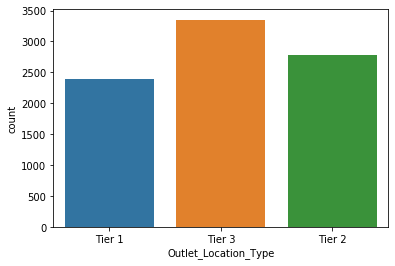

In [1224]:
sns.countplot(train_new['Outlet_Location_Type'])

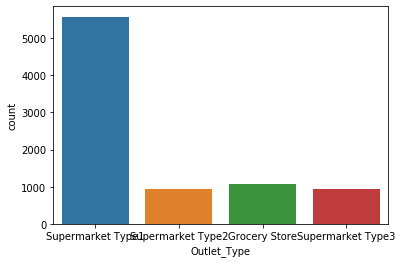

In [1225]:
sns.countplot(train_new['Outlet_Type'])

In [1226]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
 13  Item_Type_Combined         8523 non-null   objec

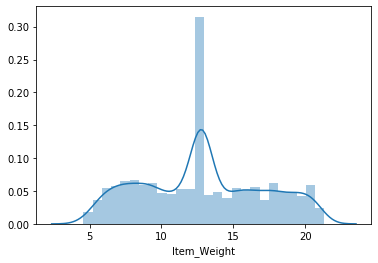

In [1227]:
sns.distplot(train_new["Item_Weight"])

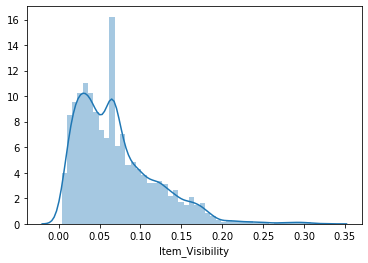

In [1228]:
sns.distplot(train_new["Item_Visibility"])

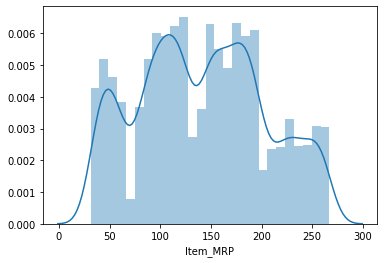

In [1229]:
sns.distplot(train_new["Item_MRP"])

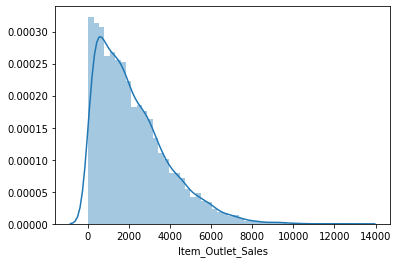

In [1230]:
sns.distplot(train_new['Item_Outlet_Sales'])

In [1231]:
# log transformation
train_new['Item_Outlet_Sales'] = np.log(1+train_new['Item_Outlet_Sales'])

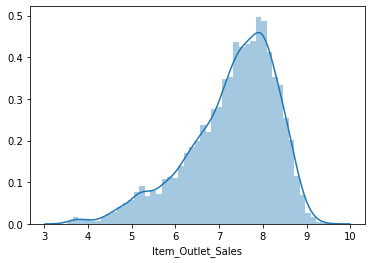

In [1232]:
sns.distplot(train_new['Item_Outlet_Sales'])

# Correlation matrix

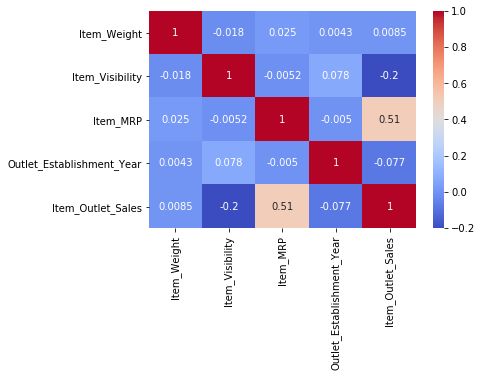

In [1233]:
corr = train_new.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Model building

In [1234]:
train2 = pd.read_csv("bigdatamart_Train.csv")

In [1235]:
train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,bigdatamart_Train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,bigdatamart_Train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,bigdatamart_Train,Food
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,732.3800,bigdatamart_Train,Food
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,bigdatamart_Train,Non-Consumable


In [1236]:
x = train2.drop(["Item_Identifier", 'Outlet_Identifier', 'source','Item_Outlet_Sales', 'Item_Type'], axis = 1)
y = train2["Item_Outlet_Sales"]
print(x.shape,y.shape)

(8523, 9) (8523,)


In [1237]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,9.30,Low Fat,0.016047,249.8092,14,Medium,Tier 1,Supermarket Type1,Food
1,5.92,Regular,0.019278,48.2692,4,Medium,Tier 3,Supermarket Type2,Drinks
2,17.50,Low Fat,0.016760,141.6180,14,Medium,Tier 1,Supermarket Type1,Food
3,19.20,Regular,0.065953,182.0950,15,Medium,Tier 3,Grocery Store,Food
4,8.93,Non-Edible,0.065953,53.8614,26,High,Tier 3,Supermarket Type1,Non-Consumable


# Label encoding and one hot encoding of categorical variables

In [1238]:
# check for categorical attributes
cat_col = []
for i in x.dtypes.index:
    if x.dtypes[i] == 'object':
        cat_col.append(i)
cat_col

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Combined']

In [1239]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
cat_col = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']
le = LabelEncoder()
for i in cat_col:
    x[i] = le.fit_transform(x[i])
x["Outlet_Establishment_Year"] = 2013-x["Outlet_Establishment_Year"]
#creating dummy variable
x = pd.get_dummies(x, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])


In [1240]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,9.30,0.016047,249.8092,1999,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,1999,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.20,0.065953,182.0950,1998,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,8.93,0.065953,53.8614,1987,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [1241]:
x.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
dtype: object

In [1242]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
new_x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x = new_x
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,-0.839226,-1.111109,1.747454,0.139541,1.084133,-0.480558,-0.738147,1.602840,-0.696678,-0.804732,-0.350395,0.798807,-0.623893,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
1,-1.639047,-1.044820,-1.489023,1.334103,-0.922396,-0.480558,1.354743,-0.623893,-0.696678,1.242650,-0.350395,0.798807,-0.623893,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558
2,1.101168,-1.096485,0.010040,0.139541,1.084133,-0.480558,-0.738147,1.602840,-0.696678,-0.804732,-0.350395,0.798807,-0.623893,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
3,1.503445,-0.087189,0.660050,0.020085,-0.922396,-0.480558,1.354743,-0.623893,-0.696678,1.242650,-0.350395,0.798807,-0.623893,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
4,-0.926780,-0.087189,-1.399220,-1.293934,-0.922396,2.080915,-0.738147,-0.623893,-0.696678,1.242650,2.853918,-1.251866,-0.623893,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.415428,-0.275319,1.180783,-1.293934,1.084133,-0.480558,-0.738147,-0.623893,-0.696678,1.242650,2.853918,-1.251866,-0.623893,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8519,-1.056929,-0.476407,-0.527301,0.497909,-0.922396,-0.480558,1.354743,-0.623893,1.435383,-0.804732,-0.350395,0.798807,-0.623893,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8520,-0.531602,-0.718431,-0.897208,0.736822,-0.922396,2.080915,-0.738147,-0.623893,1.435383,-0.804732,-0.350395,-1.251866,1.602840,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
8521,-1.333790,1.539166,-0.607977,1.334103,-0.922396,-0.480558,1.354743,-0.623893,-0.696678,1.242650,-0.350395,0.798807,-0.623893,-0.381529,-1.375891,2.860816,-0.351028,-0.321627,0.625708,-0.480558


In [1243]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [1244]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 100, test_size = 0.30)

In [1245]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5966, 20) (5966,) (2557, 20) (2557,)


In [1246]:
models = []
models.append(('lr', LinearRegression()))
models.append(('l', Lasso()))
models.append(('r', Ridge()))
models.append(('dec', DecisionTreeRegressor()))
models.append(('knn', KNeighborsRegressor()))
models.append(('svr', SVR()))
models.append(('ran', RandomForestRegressor()))
models.append(('ada', AdaBoostRegressor()))
models.append(('grb', GradientBoostingRegressor()))



results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

lr: 0.564706, 0.029379
l: 0.564703, 0.029238
r: 0.564782, 0.029457
dec: 0.178270, 0.057253
knn: 0.521549, 0.038805
svr: 0.010666, 0.019555
ran: 0.547995, 0.041309
ada: 0.480407, 0.035994
grb: 0.594503, 0.033217


score of model linear_regression is: 56.76972067423761
[2903.10036418 4179.68187402 4474.2572658  ...  852.04994523 2019.26902754
 1492.15994622]
r2 score is : 0.5515763438125891
MAE : 838.4875610991354




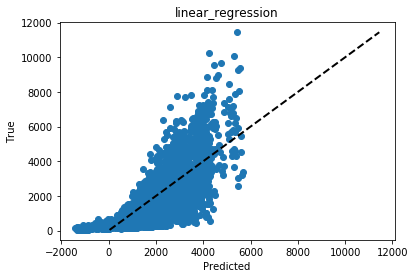

score of model random_forest is: 93.6312247857232
[3656.64018  3746.649682 5921.944784 ...  371.329976 1548.890488
 1106.439756]
r2 score is : 0.5496287803861506
MAE : 796.8565016323818




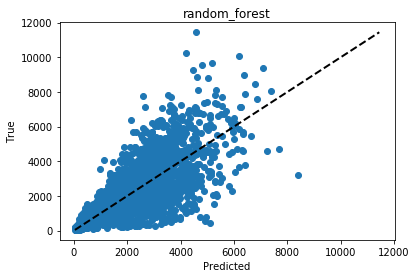

score of model gradient_boosting is: 64.03516890206333
[3237.10893617 4233.42948451 5517.42517963 ...  403.5911301  2030.66173981
 1388.01821856]
r2 score is : 0.5901473942505406
MAE : 760.2693839104244




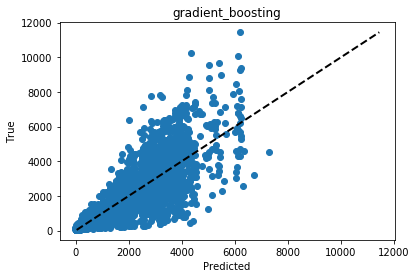

In [1247]:
lr = LinearRegression()
ran = RandomForestRegressor()
grb = GradientBoostingRegressor()

model = []
model.append(('linear_regression', LinearRegression()))
model.append(('random_forest', RandomForestRegressor()))
model.append(('gradient_boosting', GradientBoostingRegressor()))

for n, m in model:
    m.fit(x_train,y_train)
    print("score of model",n ,"is:", m.score(x_train,y_train)*100)
    predlr = m.predict(x_test)
    print(predlr)

    print("r2 score is :", r2_score(y_test, predlr))
    print("MAE :",mean_absolute_error(y_test, predlr))
    print("\n")

    plt.scatter(predlr, y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.title(n)
    plt.show()
    

# Hyper Parameter Tuning

I have been facing error for this stepd tried soo much but didnt resolved it

# Saving the model

In [1248]:
import joblib
joblib.dump(grb, "Gradientmodel.obj")

['Gradientmodel']

In [1249]:
pre_model = joblib.load("Gradientmodel.obj")

# Testing using best model

In [1250]:
test2 = pd.read_csv('bigdatamart_Test.csv')

In [1251]:
test2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,14,Medium,Tier 1,Supermarket Type1,2181.288914,bigdatamart_Test,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,6,Medium,Tier 2,Supermarket Type1,2181.288914,bigdatamart_Test,Food
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,15,Medium,Tier 3,Grocery Store,2181.288914,bigdatamart_Test,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,6,Medium,Tier 2,Supermarket Type1,2181.288914,bigdatamart_Test,Food
4,FDY38,12.792854,Regular,0.118599,Dairy,234.2300,OUT027,28,Medium,Tier 3,Supermarket Type3,2181.288914,bigdatamart_Test,Food


In [1252]:
test2 = test2.drop(columns=["Item_Identifier", 'Outlet_Identifier', 'source','Item_Type', 'Item_Outlet_Sales'],axis = 1)

In [1253]:
test2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,20.750000,Low Fat,0.007565,107.8622,14,Medium,Tier 1,Supermarket Type1,Food
1,8.300000,Regular,0.038428,87.3198,6,Medium,Tier 2,Supermarket Type1,Food
2,14.600000,Non-Edible,0.099575,241.7538,15,Medium,Tier 3,Grocery Store,Non-Consumable
3,7.315000,Low Fat,0.015388,155.0340,6,Medium,Tier 2,Supermarket Type1,Food
4,12.792854,Regular,0.118599,234.2300,28,Medium,Tier 3,Supermarket Type3,Food


In [1254]:
test2.shape

(5681, 9)

In [1255]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_MRP                   5681 non-null   float64
 4   Outlet_Establishment_Year  5681 non-null   int64  
 5   Outlet_Size                5681 non-null   object 
 6   Outlet_Location_Type       5681 non-null   object 
 7   Outlet_Type                5681 non-null   object 
 8   Item_Type_Combined         5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


In [1256]:
ca_col = []
for i in test2.dtypes.index:
    if test2.dtypes[i] == 'object':
        ca_col.append(i)
ca_col

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Combined']

In [1257]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ca_col = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']
le = LabelEncoder()
for i in ca_col:
    test2[i] = le.fit_transform(test2[i])
test2["Outlet_Establishment_Year"] = 2013-test2["Outlet_Establishment_Year"]
#creating dummy variable
test2 = pd.get_dummies(test2, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])


In [1258]:
test2.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
dtype: object

In [1259]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
new_x = pd.DataFrame(scale.fit_transform(test2), columns=test2.columns)
test2 = new_x
test2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,1.893454,-1.285777,-0.536555,0.139891,1.095940,-0.486429,-0.740811,1.602644,-0.696584,-0.804750,-0.350325,0.798824,-0.623969,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
1,-1.039426,-0.647966,-0.868937,1.095512,-0.912459,-0.486429,1.349873,-0.623969,1.435578,-0.804750,-0.350325,0.798824,-0.623969,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
2,0.444682,0.615700,1.629848,0.020438,-0.912459,2.055799,-0.740811,-0.623969,-0.696584,1.242623,-0.350325,0.798824,-0.623969,2.620767,-1.375706,-0.349374,-0.351274,-0.316748,-1.593601,2.055799
3,-1.271465,-1.124095,0.226697,1.095512,1.095940,-0.486429,-0.740811,-0.623969,1.435578,-0.804750,-0.350325,0.798824,-0.623969,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
4,0.018968,1.008857,1.508110,-1.532446,-0.912459,-0.486429,1.349873,-0.623969,-0.696584,1.242623,-0.350325,0.798824,-0.623969,-0.381568,-1.375706,-0.349374,2.846782,-0.316748,0.627510,-0.486429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.521166,-1.163194,0.004727,-0.099015,-0.912459,-0.486429,1.349873,1.602644,-0.696584,-0.804750,-0.350325,-1.251840,1.602644,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
5677,-1.204327,1.512933,0.455014,1.334417,-0.912459,-0.486429,1.349873,-0.623969,-0.696584,1.242623,-0.350325,0.798824,-0.623969,-0.381568,-1.375706,2.862264,-0.351274,-0.316748,0.627510,-0.486429
5678,-0.638952,0.077427,-0.360485,0.498248,-0.912459,2.055799,-0.740811,-0.623969,1.435578,-0.804750,-0.350325,0.798824,-0.623969,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,-1.593601,2.055799
5679,0.609583,-0.079134,1.190844,1.095512,-0.912459,-0.486429,1.349873,-0.623969,1.435578,-0.804750,-0.350325,0.798824,-0.623969,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429


In [1260]:
pre_model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [1261]:
predictions = pre_model.predict(test2)

In [1262]:
predictions

array([1031.95120947, 1403.10702584,  578.32994708, ..., 1909.09506933,
       3731.90073806, 1330.56708948])

In [1263]:
submission = pd.DataFrame({"predicted": predictions}, index=range(len(test2)))

In [1267]:
submission.to_csv("bigdatamart_prediction.csv")